Author: Daniel Abadjiev  
&nbsp;&nbsp;&nbsp; with lots of help from Eliza  
Date: June 3, 2025  
Description: a notebook to test some stuff with smartpixels data and get a handle on the data format/machine learning general things.   

Will partially follow Eliza's github, will also follow this tutorial https://www.tensorflow.org/tutorials/keras/classification

In [1]:
from OptimizedDataGenerator4 import *
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
print(tf.config.experimental.list_physical_devices())
print(tf.test.is_built_with_cuda())
print(tf.test.is_built_with_gpu_support())
print(tf.test.is_gpu_available())

2025-06-16 15:29:24.473904: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-16 15:29:24.486202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750105764.501313 3590028 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750105764.505956 3590028 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750105764.516719 3590028 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True
True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


I0000 00:00:1750105767.016042 3590028 gpu_device.cc:2019] Created device /device:GPU:0 with 11455 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:4b:00.0, compute capability: 8.6


In [2]:
#// plotting code from google ai https://www.google.com/search?client=firefox-b-1-d&q=plot+tensorflow+model+history
# then modified
def plotModelHistory(history,modelNum = -999):
    plt.subplot(211)
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model {modelNum} loss and accuracy')
    plt.ylabel('Loss')
    # plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.subplot(212)
    # Plot training & validation accuracy values
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    # plt.title(f'Model {modelNum} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


In [2]:
# data_dir = "../smartpixML/MuonColliderSim/Simulation_Output/";
# tf_dir = "./tfRecDirDaniel"
# labels_dir = "./labelsDirDaniel" #leftover 
# dataFormatter = OptimizedDataGenerator(
#     tf_records_dir=tf_dir,
#     # data_directory_path=data_dir,
#     # file_type="parquet",
#     load_records=True,
#     muon_collider=True,
#     x_feature_description=['cluster','x_profile','x_size'],
#     batch_size=3000,
#     filteringBIB=True
#     )
# dataFormatter.tfrecord_filenames.size

In [3]:
# print(dataFormatter)
# # print(dataFormatter.x_features)
# print(dataFormatter.x_feature_description)
# # dataFormatter.x_features['x_profile']
# print(dataFormatter.x_features['x_size'])
# print(np.shape(dataFormatter.x_features['x_size']))
# print(dataFormatter.labels)
# # plt.plot(dataFormatter.labels)
# model.fit(x=dataFormatter.x_features['x_size'],y=dataFormatter.labels)

In [2]:
validation_dir = "./tf_records1000Daniel/tfrecords_validation/"
train_dir = "./tf_records1000Daniel/tfrecords_train/"
x_feature_description: list = ['x_size','z_global','y_profile','x_profile','cluster']
trainODG = OptimizedDataGenerator(tf_records_dir=train_dir,load_records=True, x_feature_description=x_feature_description)
validationODG = OptimizedDataGenerator(tf_records_dir=validation_dir,load_records=True, x_feature_description=x_feature_description)
# trainODG._parse_tfrecord_fn()

In [1]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(None,1), name="z_global"),
    # tf.keras.layers.Input(shape=(13,), name="y_profile"),
    # tf.keras.layers.Dense(128,activation='relu'),
    # tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy']) 
callbacks=[]
learningRates = [0.1,0.9,0.6,0.3,0.1,0.03,0.01,0.001,0.0001,0.00001,0.000001]
callbacks.append(tf.keras.callbacks.LearningRateScheduler(lambda epoch,lr : lr if epoch<5 else lr*np.exp(-0.1)))
callbacks=[]

history = model.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=100)



NameError: name 'tf' is not defined

In [ ]:
plotModelHistory(history,1)
model.summary()
test_loss, test_acc = model.evaluate(validationODG)
print("test accuracy: "+str(test_acc))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - binary_accuracy: 0.6107 - loss: 0.6620
test accuracy: 0.646705687046051


In [8]:
#Make a model that has multpile layers
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
inputList = [input1, input2]
inputs = tf.keras.layers.Concatenate()(inputList)
stack = tf.keras.layers.Dense(10,activation='relu')(inputs)
stack = tf.keras.layers.Dense(10)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model2 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
# callbacks=[]
# learningRates = [0.1,0.9,0.6,0.3,0.1,0.03,0.01,0.001,0.0001,0.00001,0.000001]
# callbacks.append(tf.keras.callbacks.LearningRateScheduler(lambda epoch,lr : lr if epoch<5 else lr*np.exp(-0.1)))
# callbacks=[]
history2 = model2.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=100)

Epoch 1/100


2025-06-16 14:15:21.827568: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_389', 128 bytes spill stores, 128 bytes spill loads

2025-06-16 14:15:21.874054: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_389', 128 bytes spill stores, 128 bytes spill loads

2025-06-16 14:15:22.611676: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_389', 2088 bytes spill stores, 2092 bytes spill loads



 7/60 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - binary_accuracy: 0.7048 - loss: 0.6193

2025-06-16 14:15:24.541252: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_389', 100 bytes spill stores, 100 bytes spill loads

2025-06-16 14:15:24.583216: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_389', 100 bytes spill stores, 100 bytes spill loads



60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - binary_accuracy: 0.5263 - loss: 0.6675 - val_binary_accuracy: 0.5321 - val_loss: 0.6776
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - binary_accuracy: 0.5554 - loss: 0.6737 - val_binary_accuracy: 0.5969 - val_loss: 0.6710
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - binary_accuracy: 0.6111 - loss: 0.6679 - val_binary_accuracy: 0.6406 - val_loss: 0.6639
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.6266 - loss: 0.6678 - val_binary_accuracy: 0.6392 - val_loss: 0.6599
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - binary_accuracy: 0.6325 - loss: 0.6662 - val_binary_accuracy: 0.6464 - val_loss: 0.6548
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - binary_accuracy: 0.6436 - loss: 0.6575 - val_binary_accuracy: 0.6623 - val_loss: 0.6487
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - binary_accuracy: 0.6465 - loss: 0.6493 - val_binary_accuracy: 0.6818 - val_loss: 0.6410
Epoch 8/100
60/60

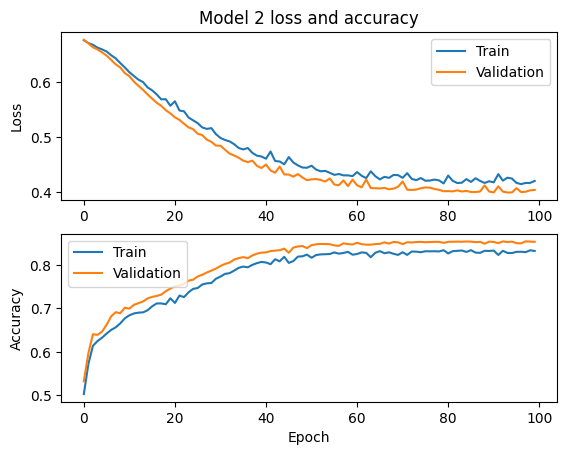

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_global            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ x_size (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2)         │          0 │ z_global[0][0],   │
│ (Concatenate)       │                   │            │ x_size[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 10)        │         30 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10)        │        110 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         11 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

In [9]:
plotModelHistory(history2,2)
model2.summary()


In [10]:
#Make a model that has multpile layers
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
inputList = [input1, input2,input3,input4]
inputs = tf.keras.layers.Concatenate()(inputList)
stack = tf.keras.layers.Dense(10,activation='relu')(inputs)
stack = tf.keras.layers.Dense(10)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model3 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
# callbacks=[]
# learningRates = [0.1,0.9,0.6,0.3,0.1,0.03,0.01,0.001,0.0001,0.00001,0.000001]
# callbacks.append(tf.keras.callbacks.LearningRateScheduler(lambda epoch,lr : lr if epoch<5 else lr*np.exp(-0.1)))
# callbacks=[]
history3 = model3.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=150)

Epoch 1/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - binary_accuracy: 0.5327 - loss: 2.5470 - val_binary_accuracy: 0.4613 - val_loss: 1.2608
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - binary_accuracy: 0.4667 - loss: 1.2088 - val_binary_accuracy: 0.4803 - val_loss: 0.9969
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - binary_accuracy: 0.4873 - loss: 0.9593 - val_binary_accuracy: 0.5202 - val_loss: 0.8522
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - binary_accuracy: 0.4923 - loss: 0.8749 - val_binary_accuracy: 0.5476 - val_loss: 0.7892
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - binary_accuracy: 0.5169 - loss: 0.8105 - val_binary_accuracy: 0.5685 - val_loss: 0.7486
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - binary_accuracy: 0.5211 - loss: 0.7914 - val_binary_accuracy: 0.5532 - val_loss: 0.7150
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - binary_accuracy: 0.5522 - loss: 0.7179 - val_binary_accuracy: 0.5875 - val_loss: 0.6910
Epoch 

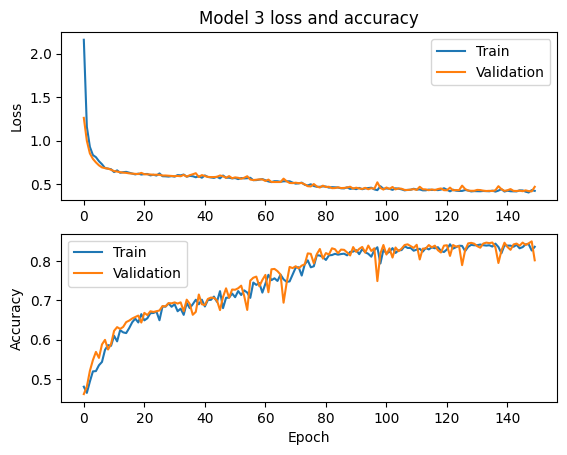

In [11]:
plotModelHistory(history3,3)

In [12]:
test_loss, test_acc = model.evaluate(validationODG)
print("sequential model validation test accuracy: "+str(test_acc))

test_loss, test_acc = model2.evaluate(validationODG)
print("model2 validation test accuracy: "+str(test_acc))

test_loss, test_acc = model3.evaluate(validationODG)
print("model3 validation test accuracy: "+str(test_acc))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - binary_accuracy: 0.6107 - loss: 0.6620
sequential model validation test accuracy: 0.646705687046051
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - binary_accuracy: 0.8205 - loss: 0.4191
model2 validation test accuracy: 0.8535537123680115
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - binary_accuracy: 0.7868 - loss: 0.4603
model3 validation test accuracy: 0.8013784885406494


In [ ]:
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
input5 = tf.keras.layers.Input(shape=(13,21), name="cluster")
# flatCluster = tf.keras.layers.Flatten()(input5)
inputList = [input5]
inputs = tf.keras.layers.Concatenate()(inputList)
stack = tf.keras.layers.Conv1D(32,(3),input_shape=(13,21))(inputs)
stack = tf.keras.layers.Flatten()(stack)
stack = tf.keras.layers.Dense(10,activation='relu')(stack)
stack = tf.keras.layers.Dense(10)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model4 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
callbacks=[]
history4 = model4.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=100)


/home/dabadjiev/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-16 14:57:46.750673: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:381] TFRecordDataset `buffer_size` is unspecified, default to 262144


Epoch 1/100


I0000 00:00:1750103867.675959 2340157 service.cc:152] XLA service 0x7fc18c0036d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750103867.675980 2340157 service.cc:160]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2025-06-16 14:57:47.702410: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750103867.860225 2340157 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-16 14:57:48.922103: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_487', 128 bytes spill stores, 128 bytes spill loads

2025-06-16 14:57:48.924009: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_487', 128 b

 3/60 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - binary_accuracy: 0.3924 - loss: 1.2415

I0000 00:00:1750103870.784658 2340157 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-06-16 14:57:52.098350: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_487', 100 bytes spill stores, 100 bytes spill loads

2025-06-16 14:57:52.165666: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_487', 100 bytes spill stores, 100 bytes spill loads



60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - binary_accuracy: 0.4918 - loss: 0.8229 - val_binary_accuracy: 0.6272 - val_loss: 0.6530
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - binary_accuracy: 0.6251 - loss: 0.6499 - val_binary_accuracy: 0.6185 - val_loss: 0.6404
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - binary_accuracy: 0.6469 - loss: 0.6241 - val_binary_accuracy: 0.6240 - val_loss: 0.6368
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - binary_accuracy: 0.6089 - loss: 0.6438 - val_binary_accuracy: 0.6534 - val_loss: 0.6188
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - binary_accuracy: 0.6587 - loss: 0.6143 - val_binary_accuracy: 0.6553 - val_loss: 0.6131
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - binary_accuracy: 0.6438 - loss: 0.6105 - val_binary_accuracy: 0.6552 - val_loss: 0.6262
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - binary_accuracy: 0.6513 - loss: 0.6127 - val_binary_accuracy: 0.6609 - val_loss: 0.6096
Epoch 8/100
60/6

NameError: name 'plotModelHistory' is not defined

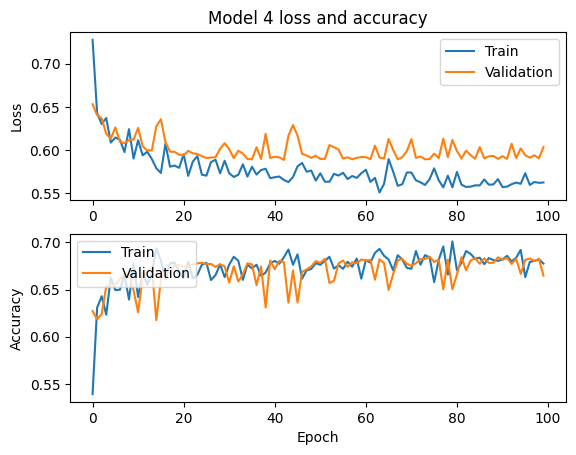

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - binary_accuracy: 0.6602 - loss: 0.5995
model4 validation test accuracy: 0.6647891402244568


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ cluster (InputLayer)            │ (None, 13, 21)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_1 (Concatenate)     │ (None, 13, 21)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 11, 32)         │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         3,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,099 (66.80 KB)

 Trainable params: 5,699 (22.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,400 (44.54 KB)

In [8]:
plotModelHistory(history4, 4)
test_loss, test_acc = model4.evaluate(validationODG)
print("model4 validation test accuracy: "+str(test_acc))
model4.summary()

In [3]:
validation_dir = "./tf_records1000DanielWithTiming/tfrecords_validation/"
train_dir = "./tf_records1000DanielWithTiming/tfrecords_train/"
x_feature_description: list = ['x_size','z_global','y_profile','x_profile','cluster']
trainODG = OptimizedDataGenerator(tf_records_dir=train_dir,load_records=True, x_feature_description=x_feature_description,time_stamps=[17,18,19])
validationODG = OptimizedDataGenerator(tf_records_dir=validation_dir,load_records=True, x_feature_description=x_feature_description,time_stamps=[17,18,19])
# trainODG._parse_tfrecord_fn()

In [ ]:
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
input5 = tf.keras.layers.Input(shape=(13,21,3), name="cluster")
# flatCluster = tf.keras.layers.Flatten()(input5)
inputList = [input5]
inputs = tf.keras.layers.Concatenate()(inputList)
stack = tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(13,21,3))(inputs)
stack = tf.keras.layers.MaxPool2D((2,2))(stack)
stack = tf.keras.layers.Conv2D(64,(3,3),activation='relu')(stack)
stack = tf.keras.layers.Flatten()(stack)
stack = tf.keras.layers.Dense(16,activation='relu')(stack)
stack = tf.keras.layers.Dense(16)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model5 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
callbacks=[]
history5 = model5.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=50)


/home/dabadjiev/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1750105794.157789 3590028 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11455 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:4b:00.0, compute capability: 8.6
2025-06-16 15:29:54.997791: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:381] TFRecordDataset `buffer_size` is unspecified, default to 262144


Epoch 1/100


I0000 00:00:1750105796.017083 3626454 service.cc:152] XLA service 0x7f11280044f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750105796.017111 3626454 service.cc:160]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2025-06-16 15:29:56.046387: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750105796.241065 3626454 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-16 15:29:57.945191: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_580', 1232 bytes spill stores, 1232 bytes spill loads



 5/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - binary_accuracy: 0.2491 - loss: 0.8950  

I0000 00:00:1750105799.342058 3626454 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 9/60 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - binary_accuracy: 0.3258 - loss: 0.8336

2025-06-16 15:30:00.975298: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_580', 48 bytes spill stores, 48 bytes spill loads

2025-06-16 15:30:01.059291: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_580', 48 bytes spill stores, 48 bytes spill loads



60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - binary_accuracy: 0.4652 - loss: 0.7319 - val_binary_accuracy: 0.6421 - val_loss: 0.6669
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - binary_accuracy: 0.6083 - loss: 0.6635 - val_binary_accuracy: 0.6497 - val_loss: 0.6606
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - binary_accuracy: 0.6581 - loss: 0.6549 - val_binary_accuracy: 0.6528 - val_loss: 0.6306
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - binary_accuracy: 0.5985 - loss: 0.6516 - val_binary_accuracy: 0.6533 - val_loss: 0.6244
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - binary_accuracy: 0.6705 - loss: 0.6140 - val_binary_accuracy: 0.6684 - val_loss: 0.6079
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - binary_accuracy: 0.7086 - loss: 0.5883 - val_binary_accuracy: 0.6721 - val_loss: 0.6055
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - binary_accuracy: 0.6693 - loss: 0.5923 - val_binary_accuracy: 0.6719 - val_loss: 0.5961
Epoch 8/100
60/6

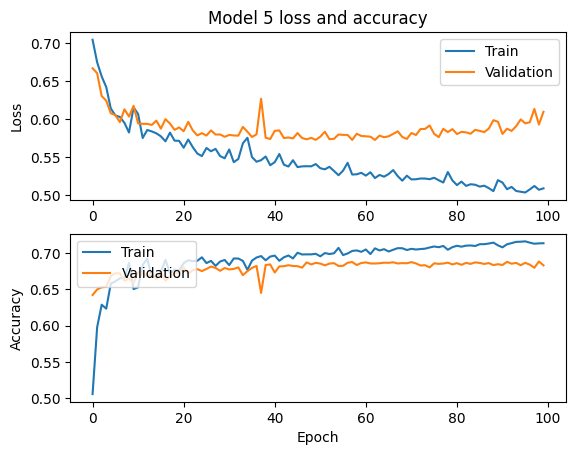

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - binary_accuracy: 0.6095 - loss: 0.6237
model5 validation test accuracy: 0.6829467415809631


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ cluster (InputLayer)            │ (None, 13, 21, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate (Concatenate)       │ (None, 13, 21, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 11, 19, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 5, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1344)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        21,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,605 (482.84 KB)

 Trainable params: 41,201 (160.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 82,404 (321.89 KB)

In [5]:
plotModelHistory(history5, 5)
test_loss, test_acc = model5.evaluate(validationODG)
print("model5 validation test accuracy: "+str(test_acc))
model5.summary()

Epoch 1/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - binary_accuracy: 0.3936 - loss: 0.8037 - val_binary_accuracy: 0.5135 - val_loss: 0.6903
Epoch 2/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - binary_accuracy: 0.5067 - loss: 0.6897 - val_binary_accuracy: 0.6603 - val_loss: 0.6703
Epoch 3/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - binary_accuracy: 0.6560 - loss: 0.6627 - val_binary_accuracy: 0.6532 - val_loss: 0.6465
Epoch 4/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - binary_accuracy: 0.6379 - loss: 0.6499 - val_binary_accuracy: 0.6431 - val_loss: 0.6583
Epoch 5/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - binary_accuracy: 0.6336 - loss: 0.6524 - val_binary_accuracy: 0.6366 - val_loss: 0.6581
Epoch 6/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - binary_accuracy: 0.5966 - loss: 0.6423 - val_binary_accuracy: 0.6571 - val_loss: 0.6440
Epoch 7/40
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - binary_accuracy: 0.6832 - loss: 0.6214 - val_binary_accuracy: 0.6768 - val_loss: 0.6197
Epoch 8/40
6

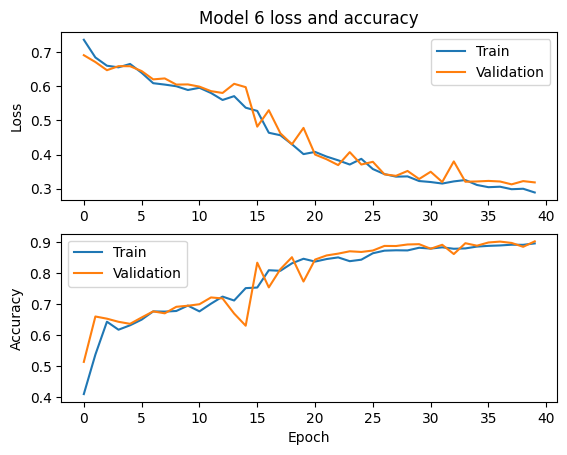

In [6]:
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
input5 = tf.keras.layers.Input(shape=(13,21,3), name="cluster")
# flatCluster = tf.keras.layers.Flatten()(input5)
inputList = [input1, input5]
# inputs = tf.keras.layers.Concatenate()(inputList)
stackConv = tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(13,21,3))(input5)
stackConv = tf.keras.layers.MaxPool2D((2,2))(stackConv)
stackConv = tf.keras.layers.Conv2D(64,(3,3),activation='relu')(stackConv)
stackConv = tf.keras.layers.Flatten()(stackConv)
stackSingles = tf.keras.layers.Dense(16,activation='relu')(input1)
# stackSingles = tf.keras.layers.Flatten()(stackSingles)
stack = tf.keras.layers.Concatenate()([stackSingles,stackConv])
stack = tf.keras.layers.Dense(16,activation='relu')(stack)
stack = tf.keras.layers.Dense(16)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model6 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
callbacks = []
history6 = model6.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=40)
plotModelHistory(history6, 6)


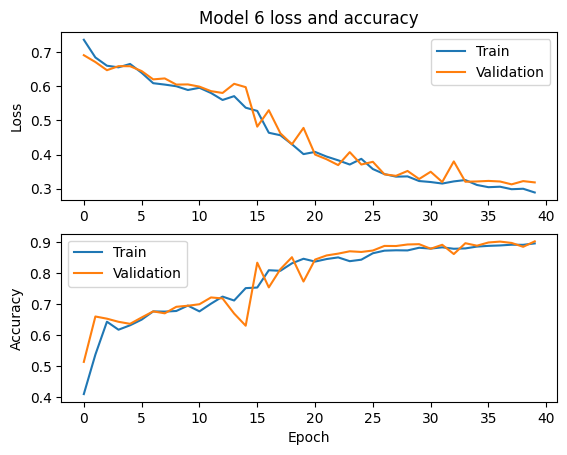

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - binary_accuracy: 0.8779 - loss: 0.3252
model6 validation test accuracy: 0.9031349420547485


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ cluster             │ (None, 13, 21, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 11, 19,    │        896 │ cluster[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 5, 9, 32)  │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_global            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 3, 7, 64)  │     18,496 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 16)        │         32 │ z_global[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1344)      │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 1360)      │          0 │ dense_3[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 16)        │     21,776 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 16)        │        272 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │         17 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 124,469 (486.21 KB)

 Trainable params: 41,489 (162.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 82,980 (324.14 KB)

In [16]:
plotModelHistory(history6,6)
test_loss, test_acc = model6.evaluate(validationODG)
print("model6 validation test accuracy: "+str(test_acc))
model6.summary()

In [8]:
saveModels = False;
if saveModels:
    filepath = "./DanielModels/model1.keras"
    model.save(filepath)
    filepath = "./DanielModels/model2.keras"
    model2.save(filepath)
    filepath = "./DanielModels/model3.keras"
    model3.save(filepath)
    filepath = "./DanielModels/model4.keras"
    model4.save(filepath)
    filepath = "./DanielModels/model5.keras"
    model5.save(filepath)
    filepath = "./DanielModels/model6.keras"
    model6.save(filepath)

In [9]:
validation_dir = "./tf_records3000DanielWithTiming/tfrecords_validation/"
train_dir = "./tf_records3000DanielWithTiming/tfrecords_train/"
x_feature_description: list = ['x_size','z_global','y_profile','x_profile','cluster']
trainODG7 = OptimizedDataGenerator(tf_records_dir=train_dir,load_records=True, x_feature_description=x_feature_description,time_stamps=[10,11,12,13,14,15,16,17,18,19])
validationODG7 = OptimizedDataGenerator(tf_records_dir=validation_dir,load_records=True, x_feature_description=x_feature_description,time_stamps=[10,11,12,13,14,15,16,17,18,19])


In [18]:
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
input5 = tf.keras.layers.Input(shape=(13,21,10), name="cluster")
# flatCluster = tf.keras.layers.Flatten()(input5)
inputList = [input1, input5]
# inputs = tf.keras.layers.Concatenate()(inputList)
stackConv = tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(13,21,10))(input5)
stackConv = tf.keras.layers.MaxPool2D((2,2))(stackConv)
stackConv = tf.keras.layers.Conv2D(64,(3,3),activation='relu')(stackConv)
stackConv = tf.keras.layers.Flatten()(stackConv)
stackSingles = tf.keras.layers.Dense(16,activation='relu')(input1)
# stackSingles = tf.keras.layers.Flatten()(stackSingles)
stack = tf.keras.layers.Concatenate()([stackSingles,stackConv])
stack = tf.keras.layers.Dense(16,activation='relu')(stack)
stack = tf.keras.layers.Dense(16)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model7 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
callbacks = []
history7 = model7.fit(x=trainODG7,validation_data=validationODG7, callbacks=callbacks,epochs=150)


Epoch 1/150
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - binary_accuracy: 0.5390 - loss: 1.0665

2025-06-16 16:13:31.838825: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_reduce_transpose_fusion', 320 bytes spill stores, 312 bytes spill loads



20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - binary_accuracy: 0.5374 - loss: 1.0558 - val_binary_accuracy: 0.5556 - val_loss: 0.6843
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - binary_accuracy: 0.6878 - loss: 0.6783 - val_binary_accuracy: 0.5555 - val_loss: 0.6817
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - binary_accuracy: 0.6177 - loss: 0.6745 - val_binary_accuracy: 0.5555 - val_loss: 0.6828
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - binary_accuracy: 0.4153 - loss: 0.6932 - val_binary_accuracy: 0.5564 - val_loss: 0.6769
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - binary_accuracy: 0.7040 - loss: 0.6566 - val_binary_accuracy: 0.5590 - val_loss: 0.6691
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - binary_accuracy: 0.5251 - loss: 0.6837 - val_binary_accuracy: 0.6469 - val_loss: 0.6756
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - binary_accuracy: 0.6693 - loss: 0.6669 - val_binary_accuracy: 0.6406 - val_loss: 0.6595
Epoch 8/150

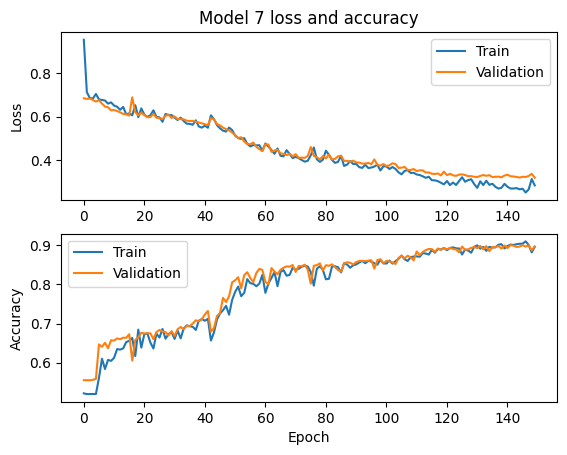

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - binary_accuracy: 0.8590 - loss: 0.3400
model7 validation test accuracy: 0.8967612981796265


In [19]:
plotModelHistory(history7,7)
test_loss, test_acc = model7.evaluate(validationODG7)
print("model7 validation test accuracy: "+str(test_acc))

In [12]:
validation_dir = "./tf_records3000DanielWith20Timing/tfrecords_validation/"
train_dir = "./tf_records3000DanielWith20Timing/tfrecords_train/"
x_feature_description: list = ['x_size','z_global','y_profile','x_profile','cluster']
trainODG8 = OptimizedDataGenerator(tf_records_dir=train_dir,load_records=True, x_feature_description=x_feature_description,time_stamps=list(range(20)))
validationODG8 = OptimizedDataGenerator(tf_records_dir=validation_dir,load_records=True, x_feature_description=x_feature_description,time_stamps=list(range(20)))
nBatches=len([f for f in os.listdir(train_dir) if ".tfrecord" in f])
print(nBatches)


20


In [ ]:
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
input5 = tf.keras.layers.Input(shape=(13,21,20), name="cluster")
# flatCluster = tf.keras.layers.Flatten()(input5)
inputList = [input1, input5]
# inputs = tf.keras.layers.Concatenate()(inputList)
stackConv = tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(13,21,20))(input5)
stackConv = tf.keras.layers.MaxPool2D((2,2))(stackConv)
stackConv = tf.keras.layers.Conv2D(64,(3,3),activation='relu')(stackConv)
stackConv = tf.keras.layers.Flatten()(stackConv)
stackSingles = tf.keras.layers.Dense(16,activation='relu')(input1)
# stackSingles = tf.keras.layers.Flatten()(stackSingles)
stack = tf.keras.layers.Concatenate()([stackSingles,stackConv])
stack = tf.keras.layers.Dense(16,activation='relu')(stack)
stack = tf.keras.layers.Dense(16)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model8 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()
#copied from Eliza's FilteringModel.py
learning_rate: float = 0.0001
nEpochs: int = 150
decay_steps = nEpochs*nBatches
warmup_steps = int(nEpochs*nBatches/10)
print(f"warmup steps: {warmup_steps}")
warmup_target = learning_rate
lr_scheduler = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=learning_rate/3, 
    decay_steps=decay_steps,
    warmup_steps=warmup_steps, 
    alpha=0.0, 
    # alpha=learning_rate/5, 
    warmup_target=warmup_target)

#from Eric's code
total_steps = decay_steps
# CosineDecay: initial_lr=1e-3, decay_steps=total_steps, alpha=0.0 (ends at 0)
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=total_steps,
    alpha=0.0
)


#from Eliza's FilteringModel.py
# This just allows plotting the learning rate after training finishes
class LearningRate(tf.keras.callbacks.Callback):
    def __init__(self,schedule) -> None:
        super().__init__()
        self.schedule = schedule
        # self.model = modelIn

    def on_epoch_end(self, epoch, logs=None):
        lr = float(self.model.optimizer.learning_rate)
        logs['lr'] = lr
    
def scheduler(epoch, lr):
    print(f"epoch{epoch}")
    if epoch<10:
        print(lr)
        return 0.001
    else:
        print(lr)
        return 0.0001

# model8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=((scheduler))), loss='binary_crossentropy', metrics=['binary_accuracy'])
model8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
callbacks = [LearningRate(scheduler)]
callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)]
callbacks = []
history8 = model8.fit(x=trainODG8,validation_data=validationODG8, callbacks=callbacks,epochs=nEpochs,verbose=1)


warmup steps: 300
Epoch 1/150
 7/20 ━━━━━━━━━━━━━━━━━━━━ 4s 368ms/step - binary_accuracy: 0.5195 - loss: 1.4242

2025-06-16 17:25:48.040748: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_reduce_transpose_fusion', 320 bytes spill stores, 312 bytes spill loads



20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step - binary_accuracy: 0.5278 - loss: 1.2315 - val_binary_accuracy: 0.4537 - val_loss: 0.6932
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 300ms/step - binary_accuracy: 0.6311 - loss: 0.6903 - val_binary_accuracy: 0.4459 - val_loss: 0.6923
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 305ms/step - binary_accuracy: 0.2930 - loss: 0.6941 - val_binary_accuracy: 0.5704 - val_loss: 0.6913
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - binary_accuracy: 0.4203 - loss: 0.6905 - val_binary_accuracy: 0.4605 - val_loss: 0.6886
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - binary_accuracy: 0.4933 - loss: 0.6851 - val_binary_accuracy: 0.5644 - val_loss: 0.6767
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - binary_accuracy: 0.5443 - loss: 0.6773 - val_binary_accuracy: 0.5922 - val_loss: 0.6736
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - binary_accuracy: 0.5620 - loss: 0.6846 - val_binary_accuracy: 0.6096 - val_loss: 0.6723
Epoch 8/15

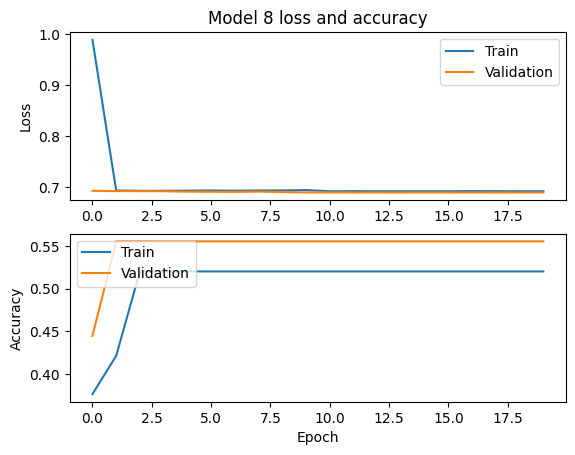

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - binary_accuracy: 0.3242 - loss: 0.7057 
model8 validation test accuracy: 0.5554732084274292


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ cluster             │ (None, 13, 21,    │          0 │ -                 │
│ (InputLayer)        │ 20)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 11, 19,    │      5,792 │ cluster[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_20    │ (None, 5, 9, 32)  │          0 │ conv2d_40[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_global            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 3, 7, 64)  │     18,496 │ max_pooling2d_20… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_79 (Dense)    │ (None, 16)        │         32 │ z_global[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_20          │ (None, 1344)      │          0 │ conv2d_41[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_20      │ (None, 1360)      │          0 │ dense_79[0][0],   │
│ (Concatenate)       │                   │            │ flatten_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_80 (Dense)    │ (None, 16)        │     21,776 │ concatenate_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_81 (Dense)    │ (None, 16)        │        272 │ dense_80[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_82 (Dense)    │ (None, 1)         │         17 │ dense_81[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 139,157 (543.59 KB)

 Trainable params: 46,385 (181.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 92,772 (362.39 KB)

In [ ]:
# print(history8.history['lr'])
# print(np.size(history8.history['lr']))
# plt.plot(history8.history['lr'])
# plt.title("learning rate")
# plt.xlabel("epoch")
# plt.show()
plotModelHistory(history8,8)
test_loss, test_acc = model8.evaluate(validationODG8)
print("model8 validation test accuracy: "+str(test_acc))
model8.summary()

In [ ]:
saveModels = False;
if saveModels:
    filepath = "./DanielModels/model7.keras"
    # model7.save(filepath)
    filepath = "./DanielModels/model8.keras"
    model8.save(filepath)